In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Data Exploration

In [2]:
df=pd.read_csv("synthetic_fraud_dataset.csv")

In [3]:
df.head()

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Timestamp,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,...,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label
0,TXN_33553,USER_1834,39.79,POS,2023-08-14 19:30:00,93213.17,Laptop,Sydney,Travel,0,...,7,437.63,3,Amex,65,883.17,Biometric,0.8494,0,0
1,TXN_9427,USER_7875,1.19,Bank Transfer,2023-06-07 04:01:00,75725.25,Mobile,New York,Clothing,0,...,13,478.76,4,Mastercard,186,2203.36,Password,0.0959,0,1
2,TXN_199,USER_2734,28.96,Online,2023-06-20 15:25:00,1588.96,Tablet,Mumbai,Restaurants,0,...,14,50.01,4,Visa,226,1909.29,Biometric,0.8400,0,1
3,TXN_12447,USER_2617,254.32,ATM Withdrawal,2023-12-07 00:31:00,76807.20,Tablet,New York,Clothing,0,...,8,182.48,4,Visa,76,1311.86,OTP,0.7935,0,1
4,TXN_39489,USER_2014,31.28,POS,2023-11-11 23:44:00,92354.66,Mobile,Mumbai,Electronics,0,...,14,328.69,4,Mastercard,140,966.98,Password,0.3819,1,1


Displays the first few rows of the dataset to understand its structure.

In [4]:
df.shape

(50000, 21)

Shows the number of rows and columns to understand dataset size.

In [5]:
df.columns

Index(['Transaction_ID', 'User_ID', 'Transaction_Amount', 'Transaction_Type',
       'Timestamp', 'Account_Balance', 'Device_Type', 'Location',
       'Merchant_Category', 'IP_Address_Flag', 'Previous_Fraudulent_Activity',
       'Daily_Transaction_Count', 'Avg_Transaction_Amount_7d',
       'Failed_Transaction_Count_7d', 'Card_Type', 'Card_Age',
       'Transaction_Distance', 'Authentication_Method', 'Risk_Score',
       'Is_Weekend', 'Fraud_Label'],
      dtype='object')

In [6]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Transaction_ID                50000 non-null  object        
 1   User_ID                       50000 non-null  object        
 2   Transaction_Amount            50000 non-null  float64       
 3   Transaction_Type              50000 non-null  object        
 4   Timestamp                     50000 non-null  datetime64[ns]
 5   Account_Balance               50000 non-null  float64       
 6   Device_Type                   50000 non-null  object        
 7   Location                      50000 non-null  object        
 8   Merchant_Category             50000 non-null  object        
 9   IP_Address_Flag               50000 non-null  int64         
 10  Previous_Fraudulent_Activity  50000 non-null  int64         
 11  Daily_Transaction_Count     

In [8]:
df.isna().sum()

Transaction_ID                  0
User_ID                         0
Transaction_Amount              0
Transaction_Type                0
Timestamp                       0
Account_Balance                 0
Device_Type                     0
Location                        0
Merchant_Category               0
IP_Address_Flag                 0
Previous_Fraudulent_Activity    0
Daily_Transaction_Count         0
Avg_Transaction_Amount_7d       0
Failed_Transaction_Count_7d     0
Card_Type                       0
Card_Age                        0
Transaction_Distance            0
Authentication_Method           0
Risk_Score                      0
Is_Weekend                      0
Fraud_Label                     0
dtype: int64

Checks for missing values to determine if data cleaning is needed.

# Exploratory Data Analysis (EDA)

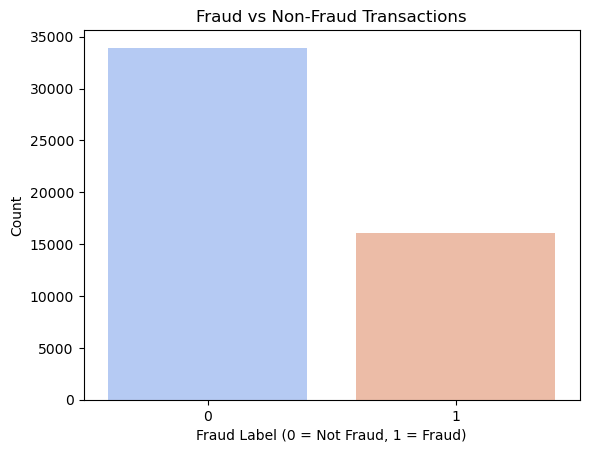

In [9]:
sns.countplot(x=df['Fraud_Label'], palette='coolwarm')
plt.title("Fraud vs Non-Fraud Transactions")
plt.xlabel("Fraud Label (0 = Not Fraud, 1 = Fraud)")
plt.ylabel("Count")
plt.show()

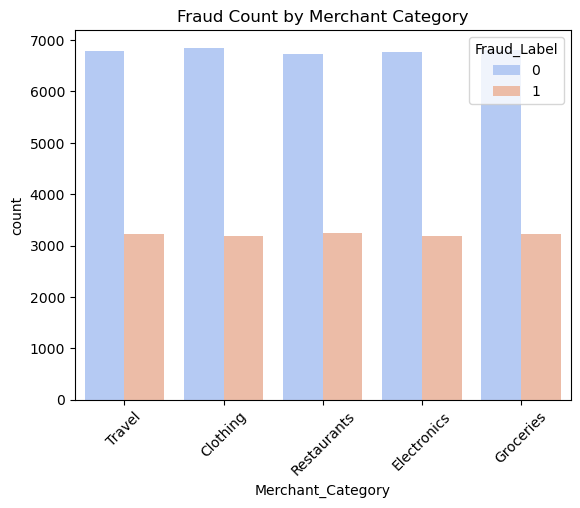

In [14]:
df['Fraud_Label'] = df['Fraud_Label'].astype(str)
sns.countplot(x = 'Merchant_Category', hue='Fraud_Label', data=df , palette='coolwarm')
plt.xticks(rotation=45)
plt.title("Fraud Count by Merchant Category")
plt.show()

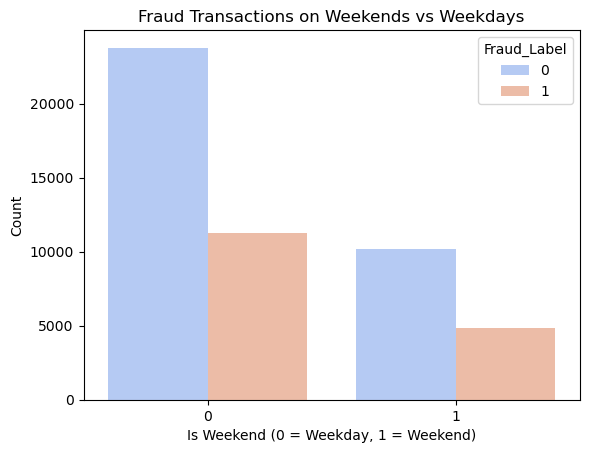

In [15]:
sns.countplot(x=df['Is_Weekend'], hue=df['Fraud_Label'], palette='coolwarm')
plt.title("Fraud Transactions on Weekends vs Weekdays")
plt.xlabel("Is Weekend (0 = Weekday, 1 = Weekend)")
plt.ylabel("Count")
plt.show()

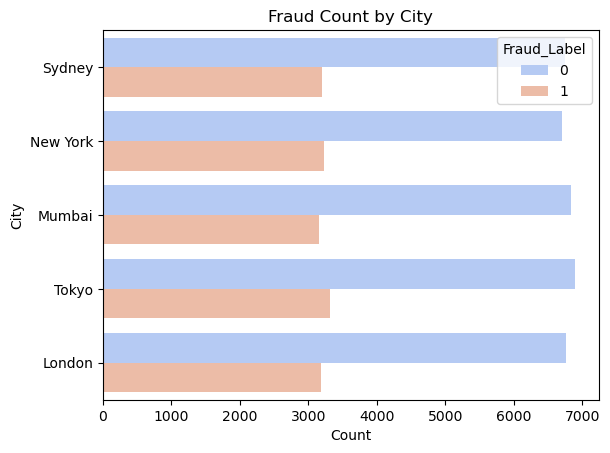

In [16]:
sns.countplot(y=df['Location'], hue=df['Fraud_Label'], palette='coolwarm')
plt.title("Fraud Count by City")
plt.xlabel("Count")
plt.ylabel("City")
plt.show()

In [17]:
df['Transaction_Hour'] = df['Timestamp'].dt.hour
df['Transaction_Day'] = df['Timestamp'].dt.day
df['Transaction_Month'] = df['Timestamp'].dt.month
df['Transaction_Weekday'] = df['Timestamp'].dt.weekday

In [18]:
df['Is_Weekend_Recomputed'] = df['Transaction_Weekday'].apply(lambda x: 1 if x >= 5 else 0)

In [19]:
df.drop(columns=['Transaction_ID','User_ID','Timestamp'], inplace=True)

In [20]:
df.duplicated().sum()

0

In [21]:
df.sample(5)

,Transaction_Amount,Transaction_Type,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,Previous_Fraudulent_Activity,Daily_Transaction_Count,Avg_Transaction_Amount_7d,...,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label,Transaction_Hour,Transaction_Day,Transaction_Month,Transaction_Weekday,Is_Weekend_Recomputed
46772,238.60,Bank Transfer,66571.92,Mobile,Tokyo,Electronics,0,0,10,139.31,...,3423.68,Password,0.1813,0,0,3,30,5,1,0
20124,21.27,Online,7099.18,Mobile,Mumbai,Travel,0,0,8,377.02,...,3758.51,Biometric,0.0851,0,0,3,31,5,2,0
11105,263.56,POS,3483.25,Tablet,Tokyo,Restaurants,0,0,6,83.15,...,2769.23,PIN,0.3420,0,0,1,19,10,3,0
2167,85.56,Online,33575.51,Tablet,Tokyo,Travel,0,0,10,404.16,...,516.30,OTP,0.1869,0,0,12,27,5,5,1
10431,3.61,POS,50694.49,Tablet,Tokyo,Electronics,0,0,6,243.66,...,504.48,OTP,0.2198,0,0,21,10,11,4,0


In [22]:
df['IP_Address_Flag'] = df['IP_Address_Flag'].astype('float64')
df['Previous_Fraudulent_Activity'] = df['Previous_Fraudulent_Activity'].astype('float64')
df['Daily_Transaction_Count'] = df['Daily_Transaction_Count'].astype('float64')
df['Failed_Transaction_Count_7d'] = df['Failed_Transaction_Count_7d'].astype('float64')
df['Card_Age'] = df['Card_Age'].astype('float64')
df['Is_Weekend'] = df['Is_Weekend'].astype('float64')
df['Fraud_Label'] = df['Fraud_Label'].astype('float64')
df['Transaction_Hour'] = df['Transaction_Hour'].astype('float64')
df['Transaction_Day'] = df['Transaction_Day'].astype('float64')
df['Transaction_Month'] = df['Transaction_Month'].astype('float64')
df['Transaction_Weekday'] = df['Transaction_Weekday'].astype('float64')
df['Is_Weekend_Recomputed'] = df['Is_Weekend_Recomputed'].astype('float64')

In [23]:
df.dtypes

Transaction_Amount              float64
Transaction_Type                 object
Account_Balance                 float64
Device_Type                      object
Location                         object
Merchant_Category                object
IP_Address_Flag                 float64
Previous_Fraudulent_Activity    float64
Daily_Transaction_Count         float64
Avg_Transaction_Amount_7d       float64
Failed_Transaction_Count_7d     float64
Card_Type                        object
Card_Age                        float64
Transaction_Distance            float64
Authentication_Method            object
Risk_Score                      float64
Is_Weekend                      float64
Fraud_Label                     float64
Transaction_Hour                float64
Transaction_Day                 float64
Transaction_Month               float64
Transaction_Weekday             float64
Is_Weekend_Recomputed           float64
dtype: object

In [24]:
df.describe()

,Transaction_Amount,Account_Balance,IP_Address_Flag,Previous_Fraudulent_Activity,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Age,Transaction_Distance,Risk_Score,Is_Weekend,Fraud_Label,Transaction_Hour,Transaction_Day,Transaction_Month,Transaction_Weekday,Is_Weekend_Recomputed
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,99.411012,50294.065981,0.05020,0.098400,7.485240,255.271924,2.003540,119.999940,2499.164155,0.501556,0.299640,0.321340,11.516380,15.719320,6.527080,3.016660,0.289660
std,98.687292,28760.458557,0.21836,0.297858,4.039637,141.382279,1.414273,68.985817,1442.013834,0.287774,0.458105,0.466996,6.902383,8.804097,3.446364,2.001165,0.453609
min,0.000000,500.480000,0.00000,0.000000,1.000000,10.000000,0.000000,1.000000,0.250000,0.000100,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,28.677500,25355.995000,0.00000,0.000000,4.000000,132.087500,1.000000,60.000000,1256.497500,0.254000,0.000000,0.000000,6.000000,8.000000,4.000000,1.000000,0.000000
50%,69.660000,50384.430000,0.00000,0.000000,7.000000,256.085000,2.000000,120.000000,2490.785000,0.502250,0.000000,0.000000,12.000000,16.000000,7.000000,3.000000,0.000000
75%,138.852500,75115.135000,0.00000,0.000000,11.000000,378.032500,3.000000,180.000000,3746.395000,0.749525,1.000000,1.000000,17.000000,23.000000,10.000000,5.000000,1.000000
max,1174.140000,99998.310000,1.00000,1.000000,14.000000,500.000000,4.000000,239.000000,4999.930000,1.000000,1.000000,1.000000,23.000000,31.000000,12.000000,6.000000,1.000000


In [25]:
df.describe(include=[object])

,Transaction_Type,Device_Type,Location,Merchant_Category,Card_Type,Authentication_Method
count,50000,50000,50000,50000,50000,50000
unique,4,3,5,5,4,4
top,POS,Tablet,Tokyo,Clothing,Mastercard,Biometric
freq,12549,16779,10208,10033,12693,12591


Provides statistical summaries of numerical features to understand data distribution.

<Axes: >

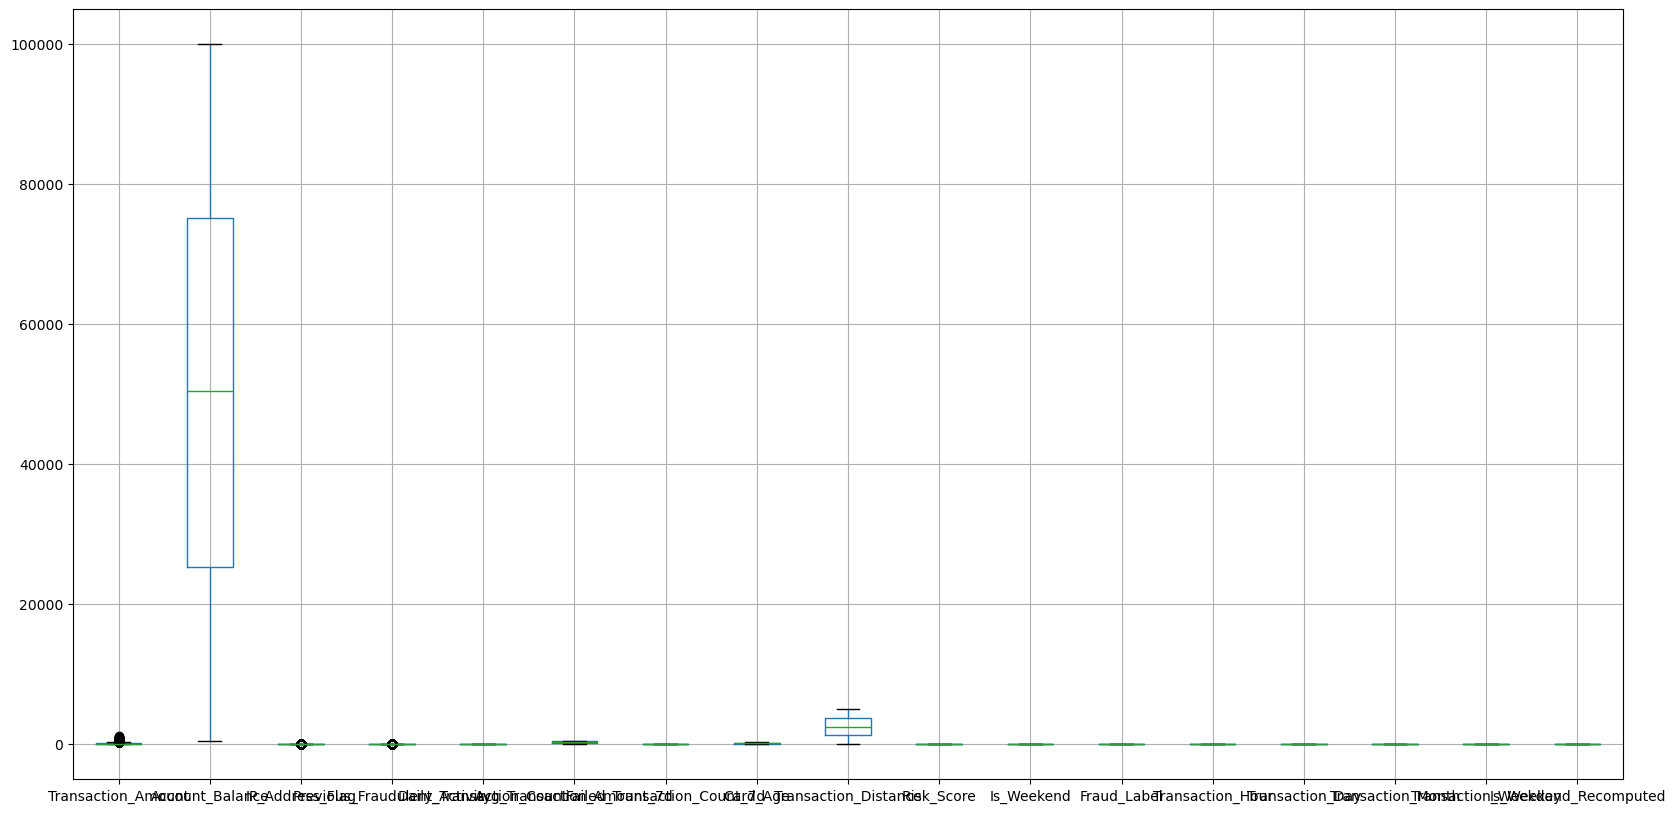

In [26]:
df.boxplot(figsize=(20,10))

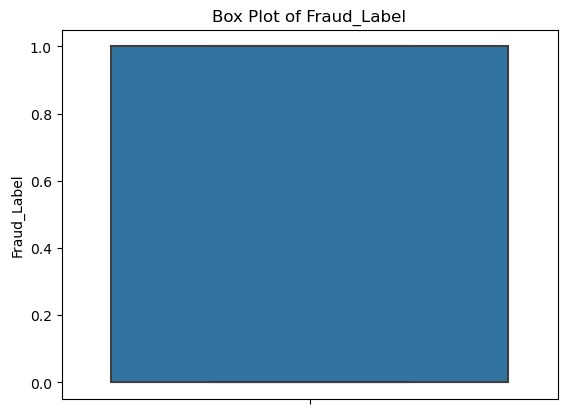

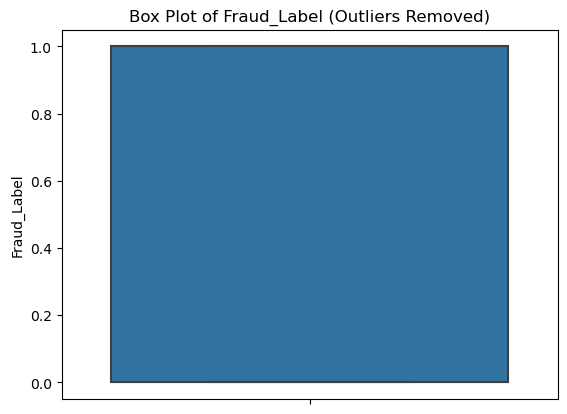

In [27]:
sns.boxplot(y=df['Fraud_Label'])
plt.title('Box Plot of Fraud_Label')
plt.show()

def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

df = remove_outliers_iqr(df, 'Fraud_Label')

sns.boxplot(y=df['Fraud_Label'])
plt.title('Box Plot of Fraud_Label (Outliers Removed)')
plt.show()

In [28]:
df=pd.get_dummies(df, columns=['Transaction_Type','Device_Type','Location','Merchant_Category','Card_Type','Authentication_Method'])

In [29]:
df.shape

(50000, 42)

In [30]:
df.sample(5)

,Transaction_Amount,Account_Balance,IP_Address_Flag,Previous_Fraudulent_Activity,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Age,Transaction_Distance,Risk_Score,...,Merchant_Category_Restaurants,Merchant_Category_Travel,Card_Type_Amex,Card_Type_Discover,Card_Type_Mastercard,Card_Type_Visa,Authentication_Method_Biometric,Authentication_Method_OTP,Authentication_Method_PIN,Authentication_Method_Password
38205,135.66,28904.78,0.0,0.0,10.0,55.15,1.0,24.0,3233.68,0.5758,...,False,False,False,False,False,True,False,False,True,False
7042,7.33,97043.42,0.0,0.0,12.0,159.48,4.0,186.0,4459.36,0.9748,...,True,False,False,True,False,False,False,False,True,False
8951,40.22,14281.51,0.0,0.0,6.0,401.27,3.0,176.0,588.04,0.9519,...,True,False,True,False,False,False,True,False,False,False
37647,18.39,75567.25,0.0,0.0,12.0,493.13,3.0,50.0,688.12,0.4672,...,False,False,True,False,False,False,False,False,True,False
40901,111.70,9098.31,0.0,0.0,7.0,471.54,2.0,61.0,4082.97,0.1748,...,True,False,True,False,False,False,True,False,False,False


# Model Selection & Training

In [31]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [32]:
X=df.drop(['Fraud_Label'],axis=1)
y=df['Fraud_Label']

In [33]:
df["Fraud_Label"].value_counts()

Fraud_Label
0.0    33933
1.0    16067
Name: count, dtype: int64

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [35]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (40000, 41)
X_test shape: (10000, 41)
y_train shape: (40000,)
y_test shape: (10000,)


In [36]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Mean Absolute Error: 0.30397333185310416
Mean Squared Error: 0.1312249172624768
R² Score: 0.40038260725789143


In [37]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=1)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)

y_pred_poly = model_poly.predict(X_test_poly)
r2_poly = r2_score(y_test, y_pred_poly)

mse_test = mean_squared_error(y_test,y_pred_poly)
mae_test = mean_absolute_error(y_test,y_pred_poly)
print(f'R2 Score: {r2_poly}, Mean Squared Error: {mse_test}, Mean Absolute Error: {mae_test}')

R2 Score: 0.40038260725777, Mean Squared Error: 0.13122491726250338, Mean Absolute Error: 0.3039733318529396


In [38]:
import xgboost as xgb
model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss')
model.fit(X_train, y_train)
y5_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y5_pred)
conf_matrix = confusion_matrix(y_test, y5_pred)
class_report = classification_report(y_test, y5_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Accuracy: 0.9994
Confusion Matrix:
[[6760    5]
 [   1 3234]]
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6765
         1.0       1.00      1.00      1.00      3235

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000

